# Sky Huang

## Research question/interests

**I want to look at the effects of humidity on the air quality, by looking at the level of CO, CO2, NO2, and other airborne molecules and particulates**. I plan to achieve this by splitting each CBSA zone into 3 categories using average relative humidity: Dry (relative humidity < 40), moderate (40 <= relative humidity <= 60), and Humid (relative humidity > 60). I plan to filter the data to isolate Dry and Humid metro areas, and then compare the air quality levels of these two groups.

## Plan 
1. Filter the data to isolate  Dry and Humid metro areas
2. look for collation between air quality and asthma levels in each group individually
3. check for collation between air quality in both groups combined
4. Analyze the data to see if there is a significant difference in air quality between the two groups



### PM3
One visualization in the EDA has shown that, at least at the state level, large bodies of water does not seem to impact air qualities to a significant degree. However, that may change as I look at each individual CBSA zone and control for loose variables such as population sizes. As such, I do not believe my RQ and plan needs further adjustments at this time.

### PM4 (Analysis draft)

#### Foreword: 
Before the analysis proper begins, it must be acknowledged that, this dataset involves inherent bias in regards to humidity, with dry CBSA zones being vastly out numbered by Humid and Moderate CBSA zones, as can be seen in the humidity per CBSA zone figure. This is partly because the US' unique geography, and partly because the more dry areas are more likely to be rural, and thus less likely to have a CBSA zone.

### Analysis:  
For this analysis, the data is filtered to isolate CBSA zones in Dry and Humid areas, with **"Dry"** areas being defined as having an average relative humidity < 40, **"Humid"** areas being defined as having an average relative humidity > 60, and **"Moderate"** areas being defined as having an average relative humidity between those two values. The data is then analyzed to see if there is a significant difference in air quality between these groups.  

looking at the bar plots for gaseous molecules at different humidity levels, it can be observed that effect of humidity on the air quality is not consistent through out all parameters, with some parameters such as sulphur dioxide, and carbon dioxide being better in dry areas, while others being better in humid areas. However, when looking at the box plots for the same dataset, it can be observed that some cases of air quality difference is due to extreme outliers.

A similar story plays out when looking at particulate matter. Notably, here is where the aforementioned bias comes into play, as the number of CBSA zones in dry areas is so small that numerous parameters simply do not have enough data to be plotted, and thus the plots for dry areas are not shown.    

Moving on from the analysis of gaseous molecules and particulate matter, the correlation between median AQI (the median is used to prevent outliers from skewing the results) and relative humidity is also analyzed. For most years, there is not any significant correlation, however, there does seems to be a relatively strong correlation during the years 2020, 2021, and 2022. Additionally, the scatter plot of median AQI over relative humidity (all years) also shows a slight correlation between the two parameters, however, this correlation is not strong enough to be considered significant.

Furthermore, there are serval choropleths showing the geographical locations of each CBSA zone, with the color of each zone representing the one of serval parameters, such as the median AQI of that zone. These choropleths are each divided into 4 subplots, with one showing every CBSA zone, one showing only CBSA zones in dry areas, one showing only CBSA zones in humid areas, and one showing only CBSA zones in moderate areas. This is done to see if there is a difference in the geographical distribution of the parameters between the three humidity levels. It is through these choropleths that the bias in the data is most apparent, as the number of CBSA zones in dry areas can be counted on one hand.  

#### Conclusion and afterthoughts:
Based on the analysis, it appears that there is not a statically significant correlation between air quality and relative humidity. It is worth noting that this observation may be influenced by extreme outliers in humid areas. Additionally, aggregate metrics such as median AQI showed a correlation with high relative humidity during certain years, namely 2020, 2021 and 2022, but it is unclear what causes this relationship. Possible explanations include recent forest fires or differences in the surrounding air quality between dry and humid areas, but more data would be needed to support these hypotheses. Further investigation is required to confirm these findings.


In [2]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pyproj import CRS
from itertools import chain
import scripts.project_functions2 as pf

In [27]:
__import__("importlib").reload(pf)

<module 'scripts.project_functions2' from '/mnt/c/Data301/project-group-group04/analysis/scripts/project_functions2.py'>

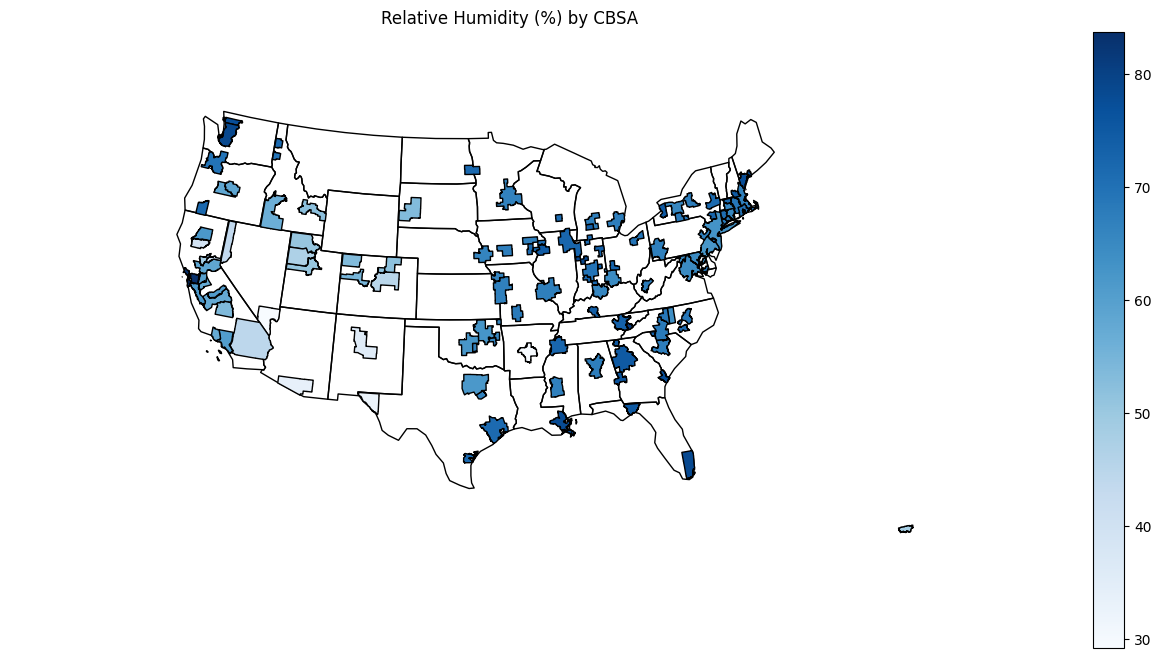

In [16]:
projection = gcrs.AlbersEqualArea(central_latitude=39.8282, central_longitude=-98.5795)
shapedata: gpd.GeoDataFrame = gpd.read_file("../data/raw/contiguous-usa.geojson").to_crs(CRS.from_user_input("EPSG:4269"))
choro_1 = gplt.polyplot(shapedata, projection=projection, figsize=(22, 8))
df = pf.processing()
mappoly = pf.mapprep(df[df['Parameter Name'] == "Relative Humidity "])
gplt.choropleth(
    mappoly,
    hue="Arithmetic Mean",
    legend=True,
    ax=choro_1,
    edgecolor="black",
    linewidth=1,
    cmap="Blues",
    projection=projection,
)
choro_1.set_title("Relative Humidity (%) by CBSA")
None
# ax = mappoly.boundary.plot(figsize=(20, 20), color="black")
# ax.set_axis_off()
# mappoly.plot(ax = ax, column="Arithmetic Mean", cmap="Blues", legend=True, legend_kwds={'label': "Relative Humidity", 'shrink': 0.5}).title.set_text("Relative Humidity by CBSA")


For this initial graph, the CBSA zones and their relative humidities are shown geographically. It can be seen that the majority of CBSA zones are in the rather humid, with only a few CBSA zones being truly dry. This i due to the US' unique geography, and potentially a side effect of the fact that rural areas are less likely to have CBSA zones.

Text(0.5, 1.05, 'Distribution of Concentration of gases by humidity')

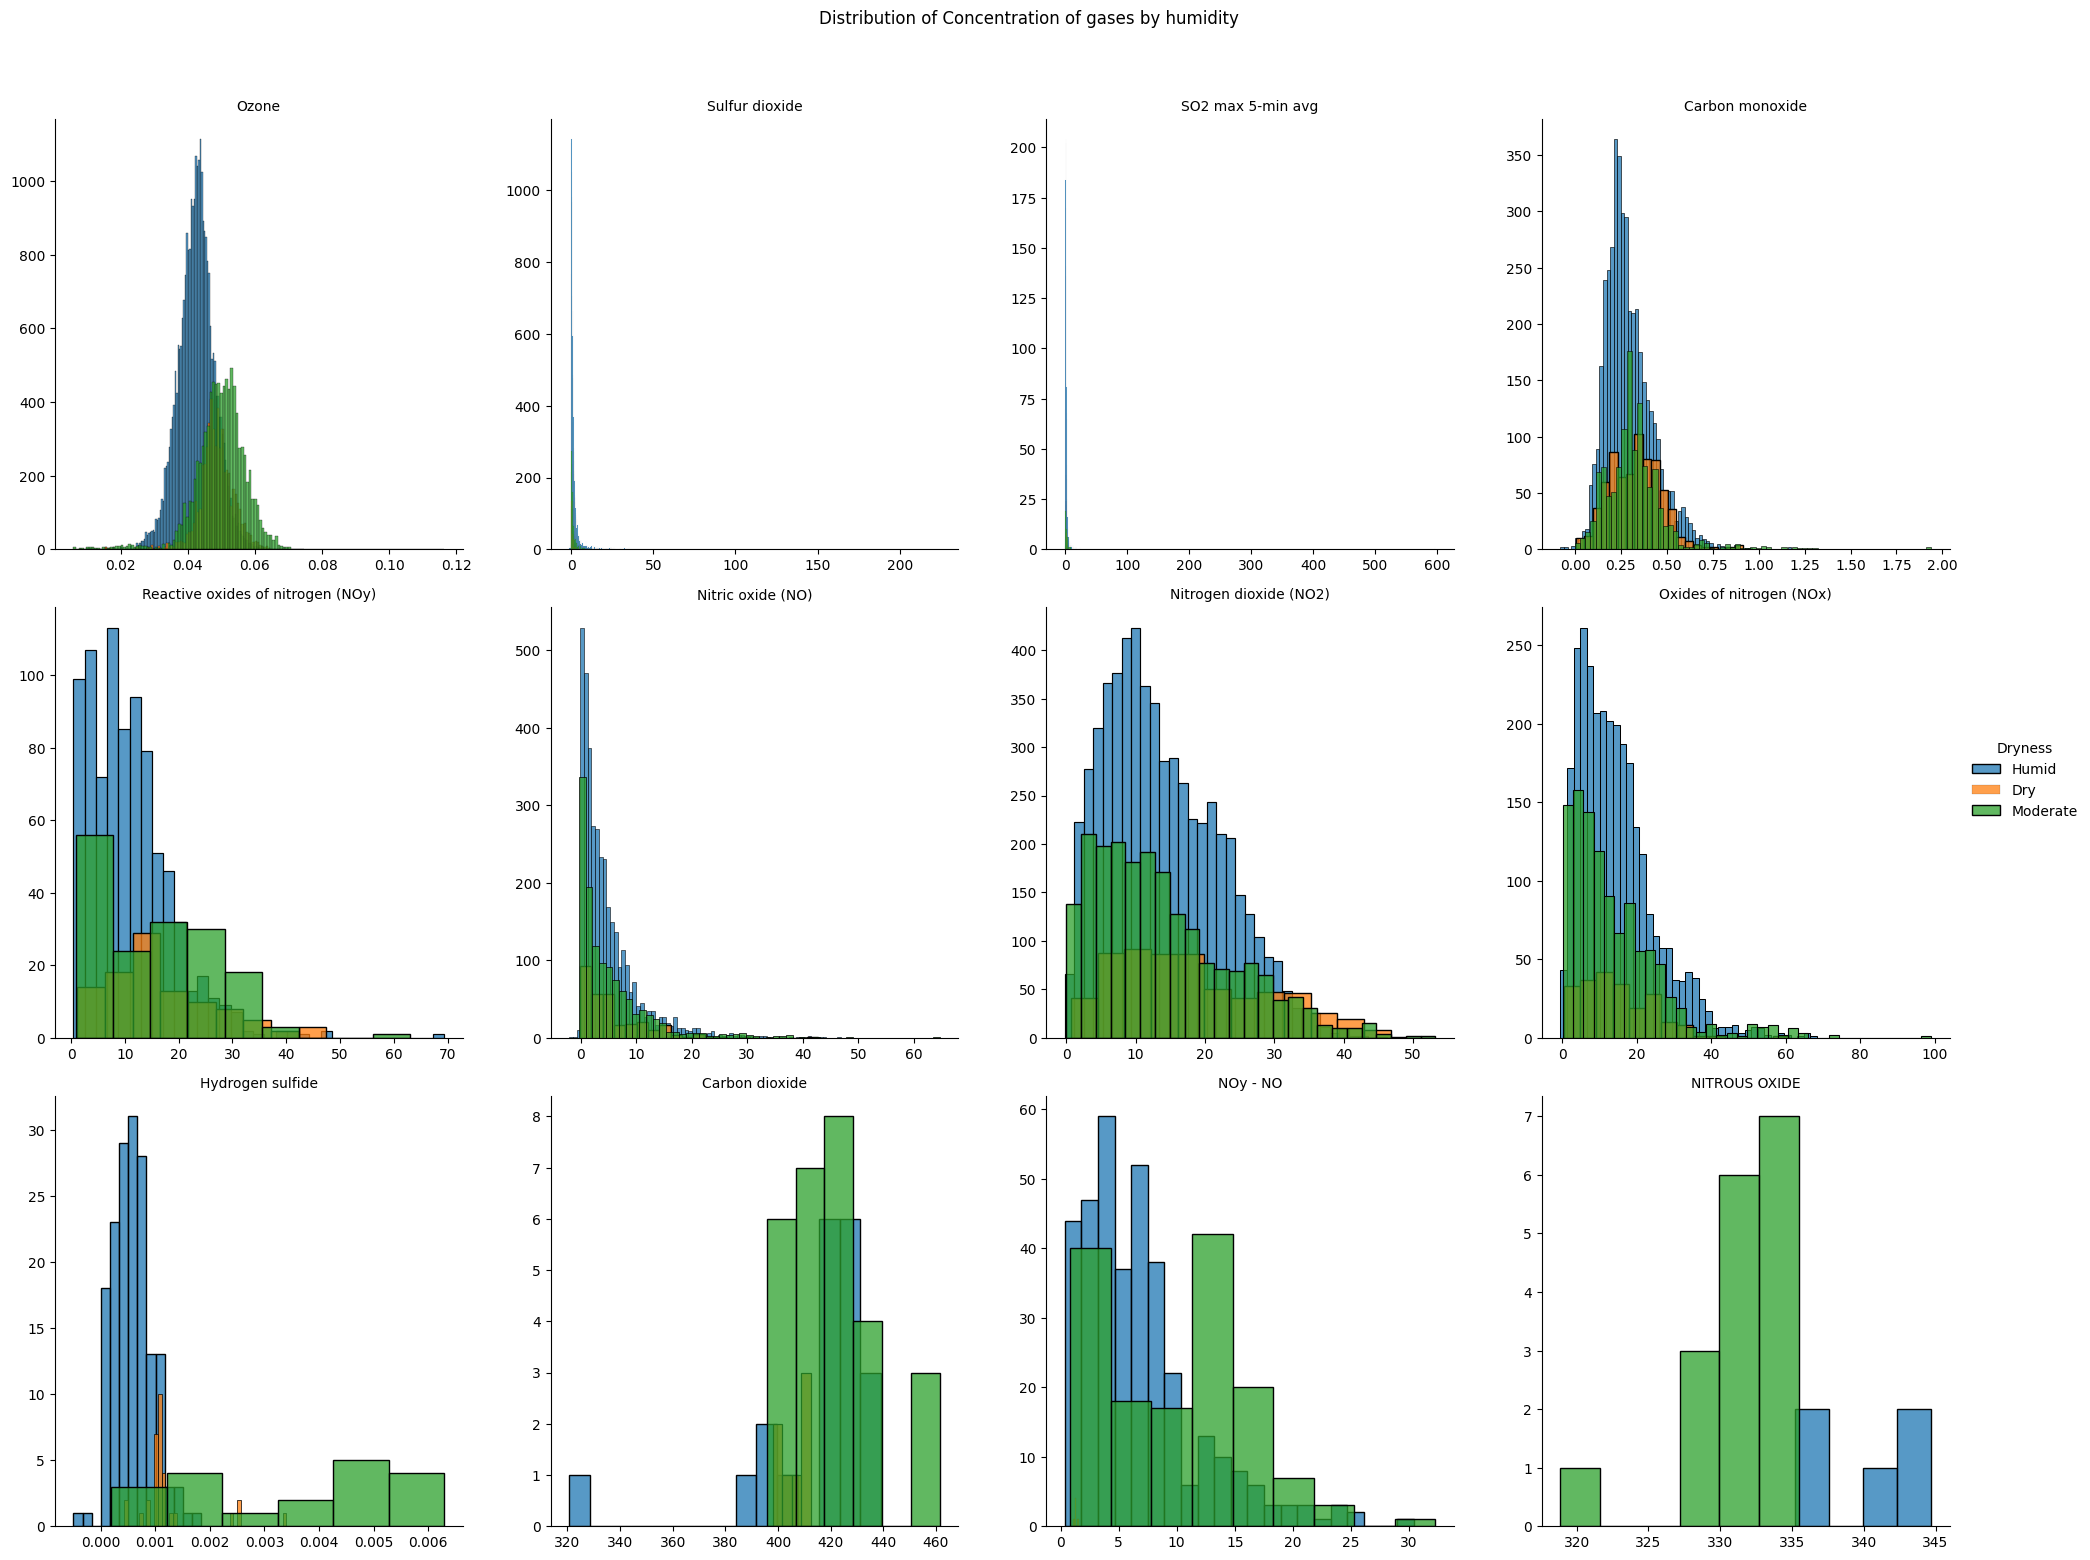

In [40]:
#df = pf.wrangling(col="Units of Measure", parameter=["Parts per billion"])
df= pf.wrangling()
df = df.loc[(df["Units of Measure"] == "Parts per billion") | (df["Parameter Name"].isin(["Ozone", "Carbon monoxide", "Carbon dioxide", "Hydrogen sulfide"]))]
#.pivot_table(index=["CBSA Name", "CBSA Code", "Year", "Dryness", "Median AQI"], columns="Parameter Name", values="Arithmetic Mean").reset_index()
#sns.pairplot(df, hue = "Dryness", kind="reg", diag_kind="kde", height=5, aspect=1, corner=True)
# sns.displot(df, x="Arithmetic Mean", hue="Dryness", col="Parameter Name", col_wrap=4, height=5, aspect=1, multiple="stack", stat = "density")
plot = sns.FacetGrid(df, col="Parameter Name", height=5, aspect=1,sharey=None, col_wrap=4,sharex=None, legend_out=True,hue = "Dryness").map_dataframe(sns.histplot, x = "Arithmetic Mean",legend=True)
plot.add_legend()
plot.set_axis_labels("", "")
plot.set_titles("{col_name}")
plot.fig.suptitle("Distribution of Concentration of gases by humidity", y=1.05)

Histograms of the distribution of various gases in different humidity levels. Overall, these graph show no particular trend between the distribution of the gases and humidity levels, However, it can be observed that humid areas have a higher concentration of Nitrous Oxide, but that may be due to the low number of data points, causing the plot to be skewed.

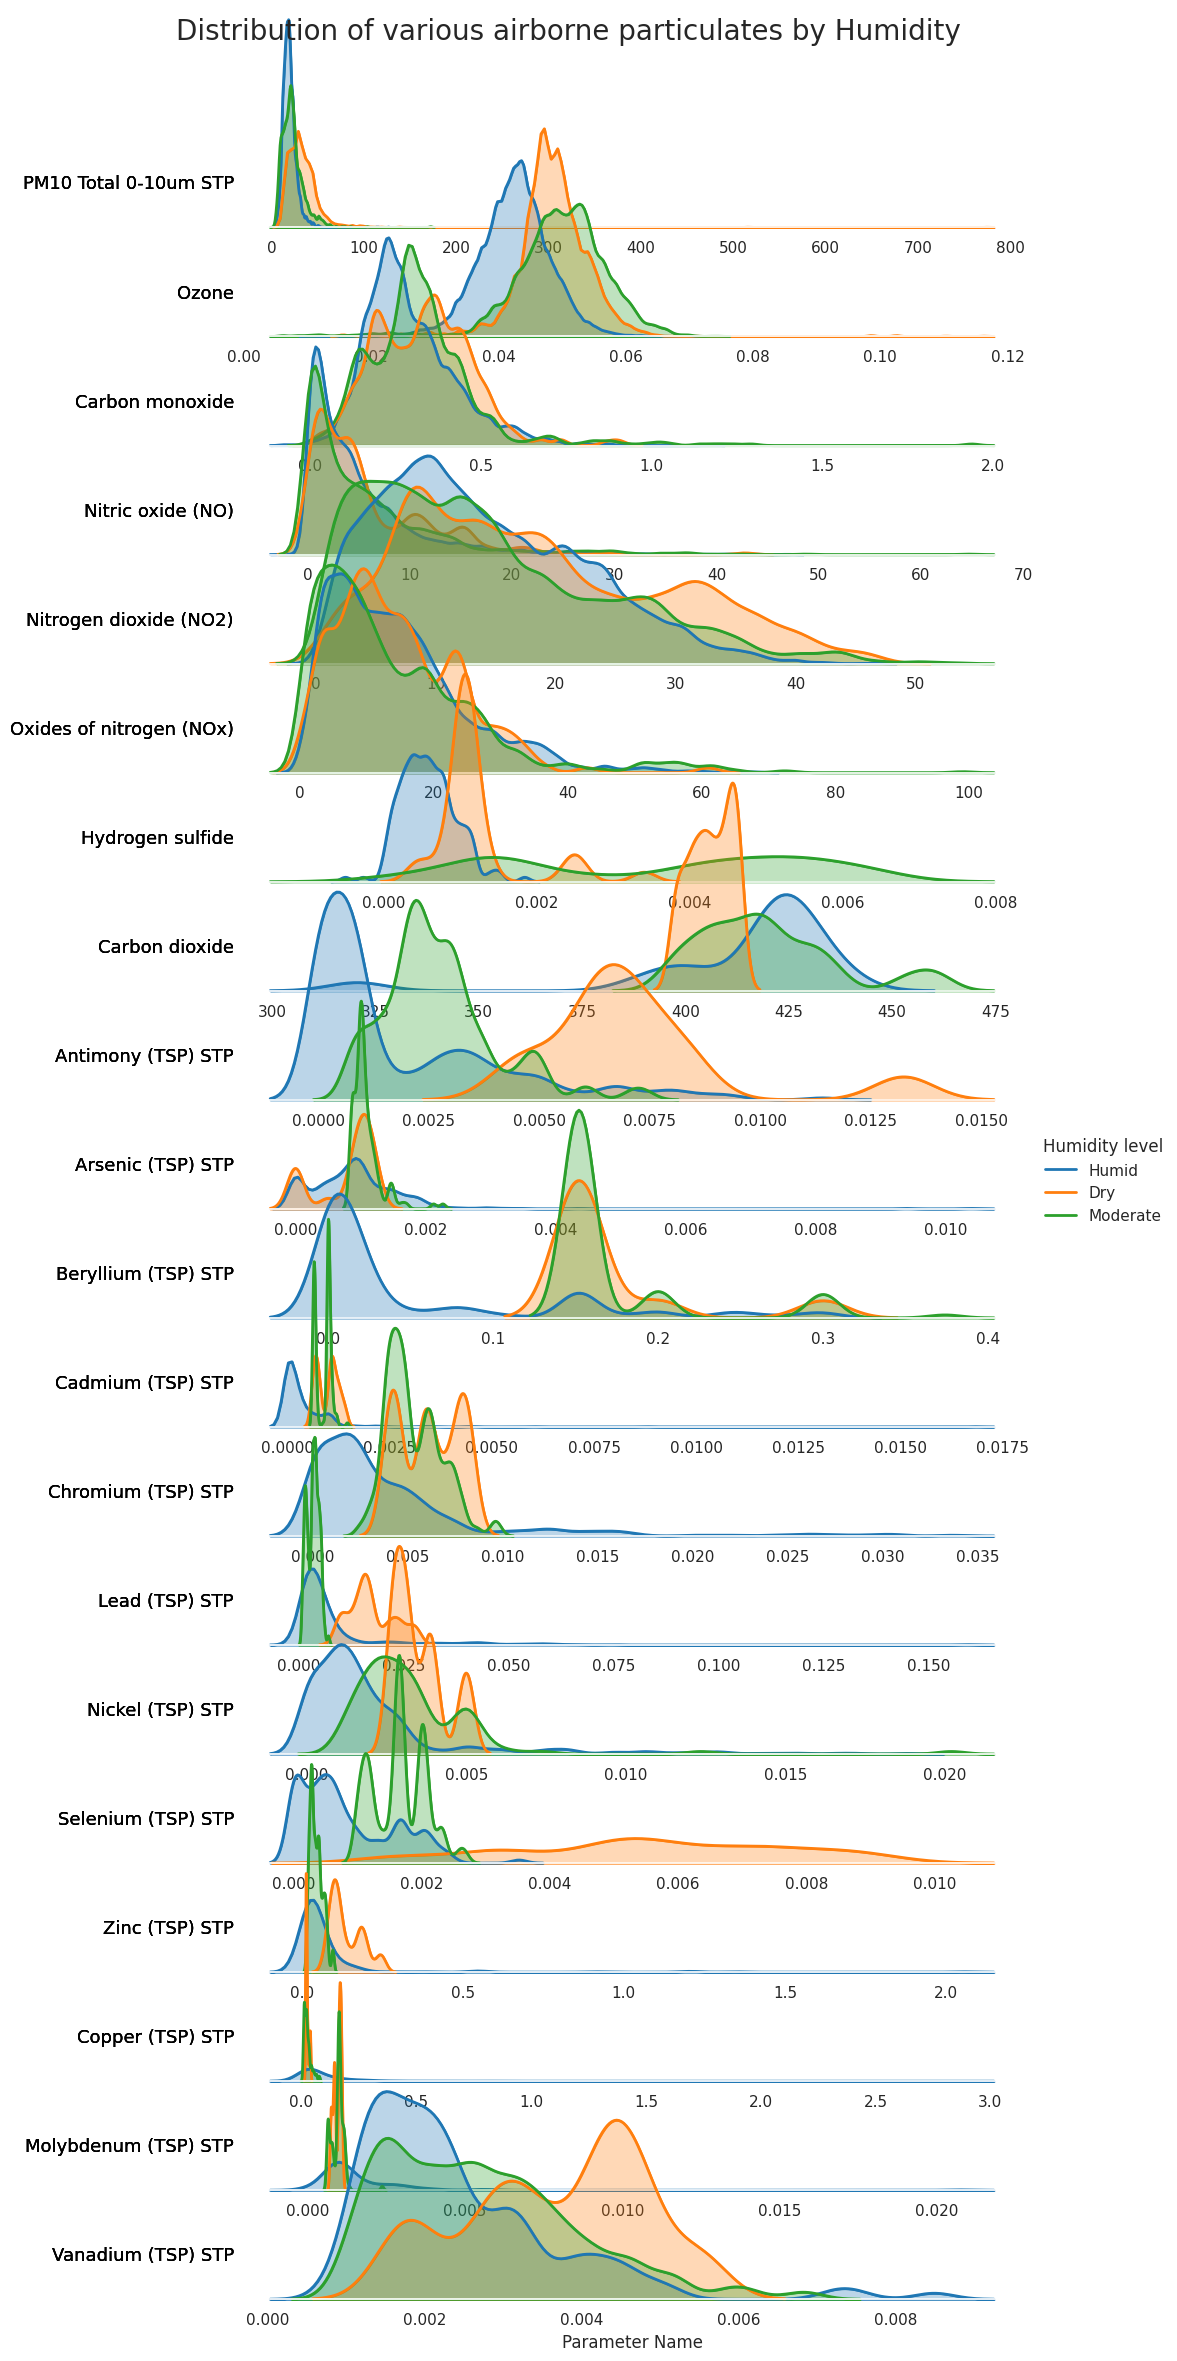

In [5]:
df = pf.wrangling(
    parameter=[
        "Ozone", "Carbon monoxide", "Carbon dioxide", "Hydrogen sulfide",
        "SUlphur dioxide", "Nitrogen dioxide (NO2)", "Nitric oxide (NO)", "Oxides of nitrogen (NOx)",
        "PM10 Total 0-10um STP",
        "Antimony (TSP) STP",
        "Arsenic (TSP) STP",
        "Beryllium (TSP) STP",
        "Boron (TSP) STP",
        "Cadmium (TSP) STP",
        "Chromium (TSP) STP",
        "Copper (TSP) STP",
        "Lead (TSP) STP",
        "Molybdenum (TSP) STP",
        "Nickel (TSP) STP",
        "Selenium (TSP) STP",
        "Sulfur dioxide (SO2) STP",
        "Vanadium (TSP) STP",
        "Zinc (TSP) STP",
    ]
)
sns.set_theme(style="dark", rc={"axes.facecolor": (0, 0, 0, 0)})
plot = sns.FacetGrid(
    df,
    col="Parameter Name",
    height=1.2,
    aspect=9,
    sharey=None,
    col_wrap=1,
    sharex=None,
    hue="Dryness",
    legend_out=True,
    palette='tab10',
)
plot.map(sns.kdeplot, "Arithmetic Mean", clip_on=False, fill=True, bw_adjust=0.5, alpha=0.3, linewidth=1.5)
plot.map(sns.kdeplot, "Arithmetic Mean", clip_on=False, lw=2, bw_adjust=0.5)
plot.set_axis_labels("", "")
plot.despine(left=True)


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, x.iloc[0], color="black", fontsize=13, ha="right", va="center", transform=ax.transAxes)


plot.map(label, "Parameter Name")
plot.fig.subplots_adjust(hspace=-0.5)
plot.set_titles("")
plot.set(yticks=[])
plot.add_legend(title="Humidity level")
plot.fig.suptitle("Distribution of various airborne particulates by Humidity", fontsize=20)

None

Ridgeplots for various pollutants. Across these plots, a trend can be noticed that, for most parameters, the humidity level does not affect the concentration in a statically significant way. However, certain parameters such as Antimony do seem to be more densely concentrated in dry areas.

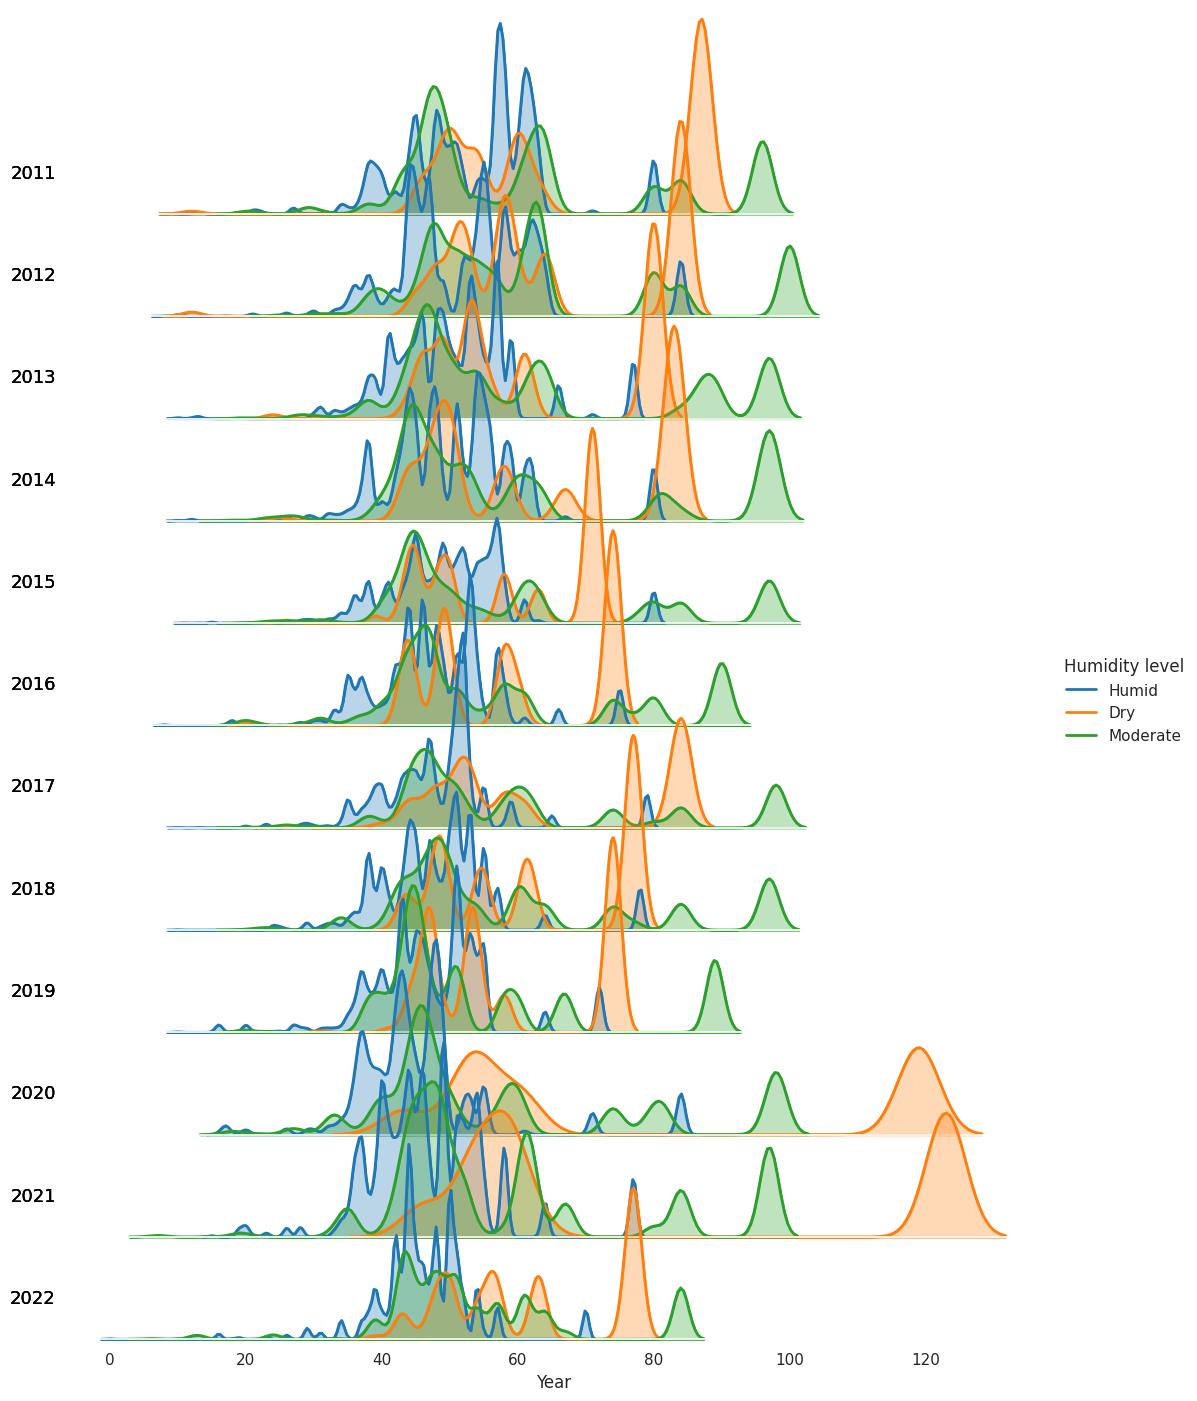

In [8]:
df = pf.wrangling()
# plot = sns.FacetGrid(df, col="Year", height=5, aspect=1,sharey="all", col_wrap=4,sharex=None).map_dataframe(sns.barplot, y = "Median AQI", x = "Dryness", order= ["Dry", "Moderate", "Humid"]).set_axis_labels("", "Median AQI")
# plot.fig.suptitle("Median AQI by Humidity level across years", fontsize=20, y=1.05)
plot = sns.FacetGrid(
    df,
    col="Year",
    height=1.2,
    aspect=9,
    sharey=False,
    col_wrap=1,
    sharex=True,
    hue="Dryness",
    legend_out=True,
    palette='tab10',
)
plot.map(sns.kdeplot, "Median AQI", clip_on=False, fill=True, bw_adjust=0.5, alpha=0.3, linewidth=1.5)
plot.map(sns.kdeplot, "Median AQI", clip_on=False, lw=2, bw_adjust=0.5)
plot.set_axis_labels("", "")
plot.despine(left=True)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, x.iloc[0], color="black", fontsize=13, ha="right", va="center", transform=ax.transAxes)
plot.map(label, "Year")
plot.fig.subplots_adjust(hspace=-0.5)
plot.set_titles("")
plot.set(yticks=[])
plot.add_legend(title="Humidity level")



Ridgeplots of median AQI at different humidity levels across years. From these, it can be observed that the median AQI tends to form a bimodal distribution with, one mode around 40 - 60 and the other around 80 - 100. Generally, very few humid areas are found in the second mode. This means, on average, humid regions have lower median AQI than dry regions. Additionally, the second mode for dry areas was centered around an AQI of 120 from 2020 to 2021, which may be due to the recent forest fires in the western US. However, this trend is not consistent across all years, and thus is likely not to be statistically significant.

[Text(0.5, 1.0, 'Median AQI by Humidity Level'),
 Text(0.5, 0, 'Relative Humidity'),
 Text(0, 0.5, 'Median AQI')]

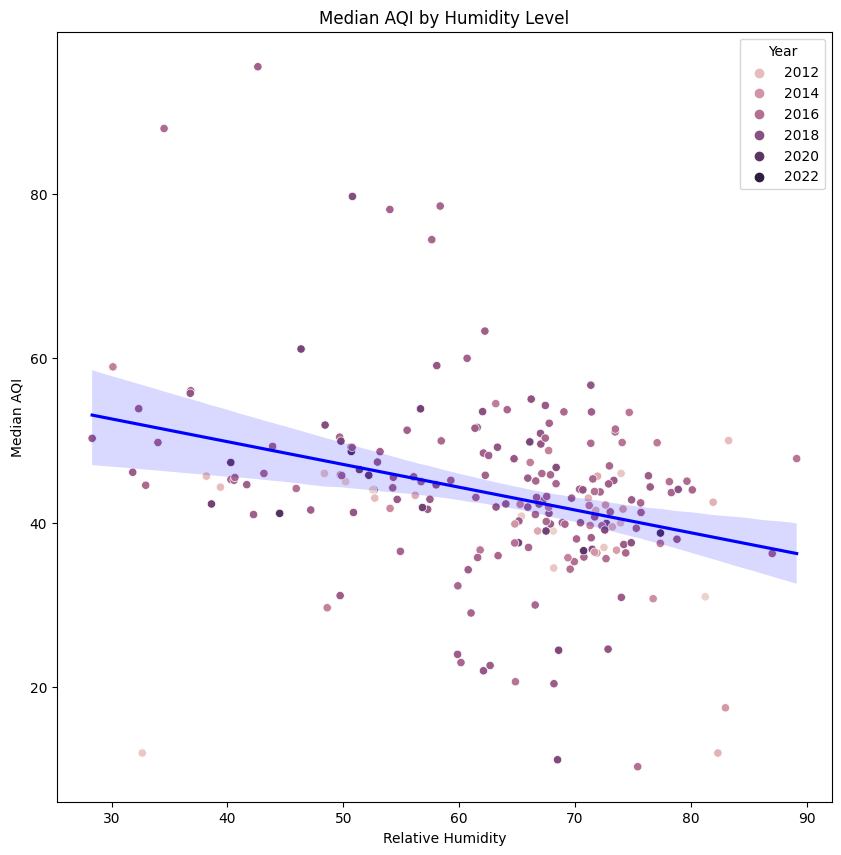

In [36]:
df=pf.processing()
df = df.loc[df["Parameter Name"] == "Relative Humidity ", ["Median AQI", "Arithmetic Mean","CBSA Name", "Year"]].groupby(["CBSA Name"])[["Median AQI", "Arithmetic Mean","Year"]].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="Arithmetic Mean", y="Median AQI", ax = ax, hue= "Year").set(title="Median AQI by Humidity Level", xlabel="Relative Humidity", ylabel="Median AQI",)
sns.regplot(data=df, x="Arithmetic Mean", y="Median AQI", ax = ax, scatter=False, color="blue").set(title="Median AQI by Humidity Level", xlabel="Relative Humidity", ylabel="Median AQI",)

Scatter plot of median AQI over relative humidity (numeric). From this, it can be observed that there seems to be a slight correlation between median AQI and relative humidity, however, this correlation is not strong enough to be considered significant. Additionally, the scatter plot also shows that the data contains extreme outliers, which may be skewing the results.

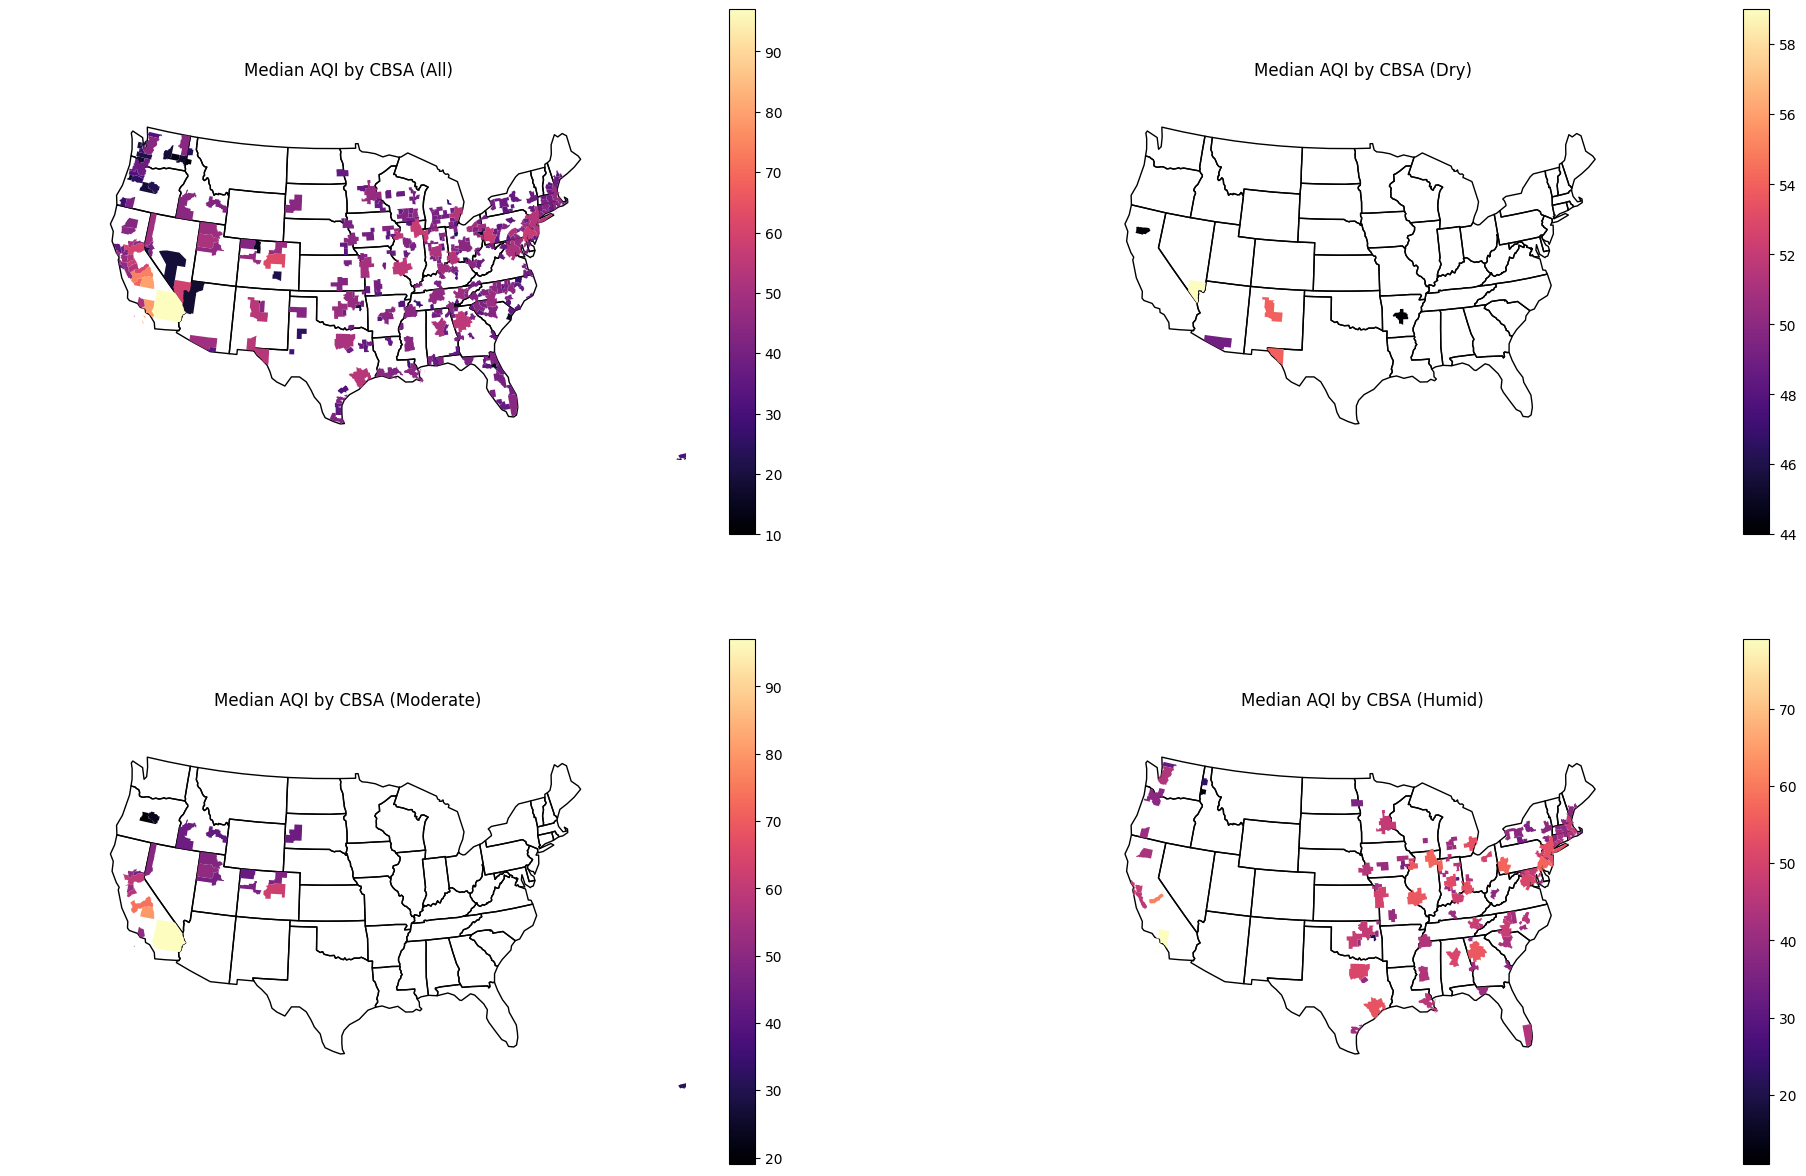

In [30]:
projection = gcrs.AlbersEqualArea(central_latitude=39.8282, central_longitude=-98.5795)
fig, axarr = plt.subplots(
    2,
    2,
    figsize=(24, 15),
    sharex=True,
    sharey=True,
    squeeze=True,
    subplot_kw={"projection": projection}
)
shapedata: gpd.GeoDataFrame = gpd.read_file("../data/raw/contiguous-usa.geojson").to_crs(CRS.from_user_input("EPSG:4269"))
df = pf.wrangling()
for param, ax in zip(["All","Dry", "Moderate", "Humid"], chain.from_iterable(axarr)):
    if param == "All":
        mappoly = pf.mapprep(df)
    else: 
        mappoly = pf.mapprep(df[df['Dryness'] == param])
    gplt.polyplot(
            shapedata,
            ax=ax,
        )
    plot = gplt.choropleth(mappoly, hue="Median AQI", cmap="plasma", legend=True, ax=ax).set_title(f"Median AQI by CBSA ({param})")

Cheoropleths of median AQI by CBSA zones, grouped by their humidity level. No obvious trends can be observed from these plots, however, it is worth noting that the range of values for dry areas is quite narrow. This is likely due to the number of CBSA zones in dry areas being vastly outnumbered by CBSA zones in humid and moderate areas.

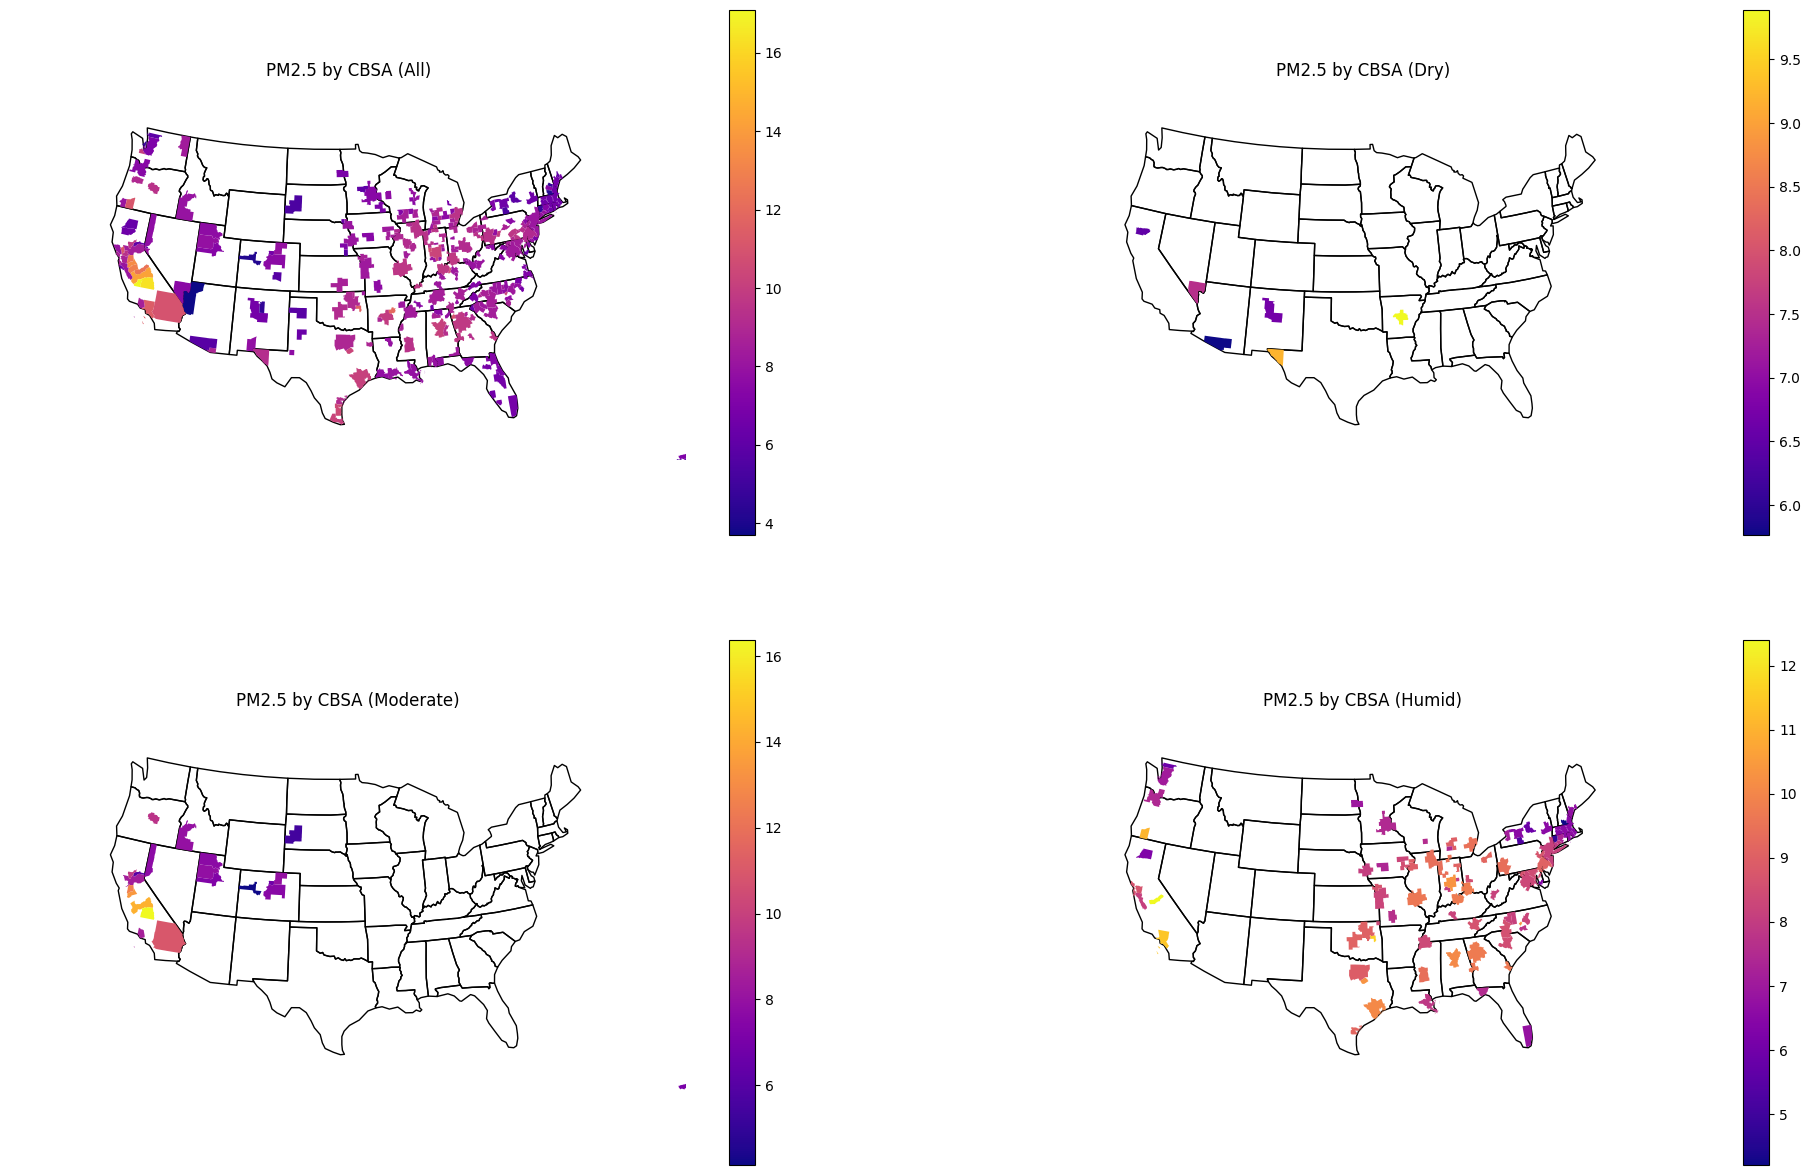

In [39]:
projection = gcrs.AlbersEqualArea(central_latitude=39.8282, central_longitude=-98.5795)
fig, axarr = plt.subplots(
    2,
    2,
    figsize=(24, 15),
    sharex=True,
    sharey=True,
    squeeze=True,
    subplot_kw={"projection": projection}
)
shapedata: gpd.GeoDataFrame = gpd.read_file("../data/raw/contiguous-usa.geojson").to_crs(CRS.from_user_input("EPSG:4269"))
df = pf.wrangling()
for param, ax in zip(["All","Dry", "Moderate", "Humid"], chain.from_iterable(axarr)):
    if param == "All":
        mappoly = pf.mapprep(df[df['Parameter Name'] == "PM2.5 - Local Conditions"])
    else: 
        mappoly = pf.mapprep(df[(df['Dryness'] == param)&(df['Parameter Name'] == "PM2.5 - Local Conditions")])
    gplt.polyplot(
            shapedata,
            ax=ax,
        )
    gplt.choropleth(mappoly, hue="Arithmetic Mean", cmap="inferno", legend=True, ax=ax).set_title(f"PM2.5 by CBSA ({param})")

Cheoropleths of PM2.5 by CBSA zones, grouped by their humidity level. No obvious trends can be observed from these plots, further reinforcing the observed trend in the previous plots. However, it is worth noting that the highest PM2.5 concentration are in moderate areas, which may be due to the fact that moderate areas are more likely to be urban areas or perhaps a side effect of recent forest fires in the western US.

In [2]:
df = pf.wrangling()
df.loc[
    ((df["Units of Measure"] == "Parts per billion") | (df["Units of Measure"] == "Parts per million"))
    | (df["Parameter Name"] == "Relative Humidity ")
].pivot_table(
    index=["CBSA Name", "CBSA Code", "Year", "Dryness", "Median AQI"],
    columns="Parameter Name",
    values="Arithmetic Mean",
).reset_index().to_csv(
    "../data/processed/fortableau.csv", index=False
)